<a href="https://colab.research.google.com/github/manjirikulkarni03/cardiovascular_risk_prediction/blob/main/Manjiri_data_cardiovascular_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [349]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

# Adding this to ignore future warnings
import warnings
warnings.filterwarnings("ignore")

# Importing libraries for visualizing decison tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# importing missingo library which helps us to visualize the missing values
import missingno as msno

# code to see the execution time in mili seconds
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 6.78 s (started: 2023-02-22 14:55:09 +00:00)


### Dataset Loading

In [350]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 4.1 s (started: 2023-02-22 14:55:16 +00:00)


In [351]:
# Load Dataset
df=pd.read_csv('/content/drive/MyDrive/data_cardiovascular_risk.csv')

time: 24.5 ms (started: 2023-02-22 14:55:20 +00:00)


### Dataset First View

In [352]:
# Dataset First Look
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


time: 31.3 ms (started: 2023-02-22 14:55:20 +00:00)


In [353]:
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


time: 32.5 ms (started: 2023-02-22 14:55:20 +00:00)


### Dataset Rows & Columns count

In [354]:
# Dataset Rows & Columns count
print(f"Rows={df.shape[0]}, Columns={df.shape[1]}") 

Rows=3390, Columns=17
time: 1.86 ms (started: 2023-02-22 14:55:20 +00:00)


### Dataset Information

In [355]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [356]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

time: 12.2 ms (started: 2023-02-22 14:55:20 +00:00)


This means we are not having any duplicate value in our dataset.

#### Missing Values/Null Values

In [357]:
# Missing Values/Null Values Count
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

time: 16.5 ms (started: 2023-02-22 14:55:20 +00:00)


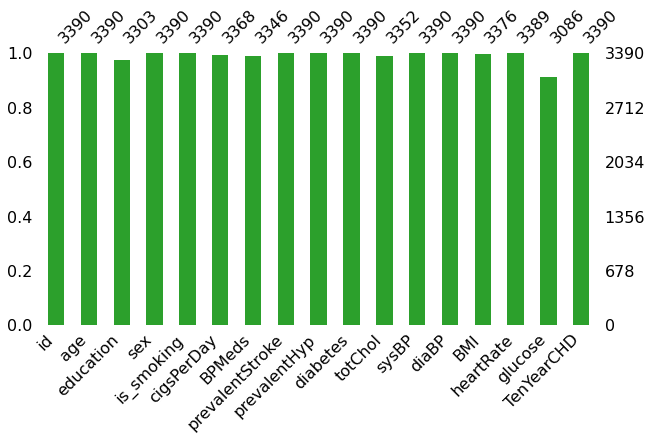

time: 1.15 s (started: 2023-02-22 14:55:20 +00:00)


In [358]:
# Visualizing the missing values
msno.bar(df,figsize=(10,5), color="tab:green")

### What did you know about your dataset?

1. Our dataset contains 3390 rows and 17 columns.
2. It contains null values in total 7 features Viz.Education,CigsPerDay,BPMeds,totChol,BMI,heartRate,Glucose etc.
3. It do not contain any duplicate value.
4. There are total 6 categorical features in our dataset Viz. sex,is_smoking,BPMeds,PrevalentStroke,prevalentHyp,diabetes etc.
5. dataset contain features having different dtypes(int,float,object) which we need to further deal with.

## ***2. Understanding Your Variables***

In [359]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

time: 4.14 ms (started: 2023-02-22 14:55:21 +00:00)


In [360]:
# Dataset Describe
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


time: 60.3 ms (started: 2023-02-22 14:55:21 +00:00)


### Variables Description 

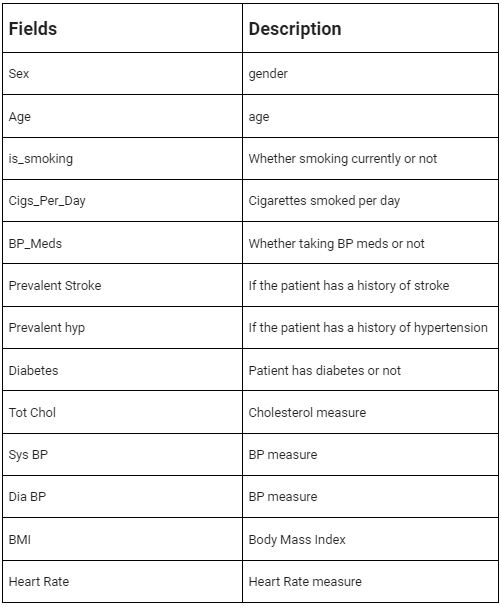

### Check Unique Values for each variable.

In [361]:
# Check Unique Values for each variable.
for i in df.columns:
  print(f'Unique values of i are {df[i].unique()}')

Unique values of i are [   0    1    2 ... 3387 3388 3389]
Unique values of i are [64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]
Unique values of i are [ 2.  4.  1.  3. nan]
Unique values of i are ['F' 'M']
Unique values of i are ['YES' 'NO']
Unique values of i are [ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]
Unique values of i are [ 0. nan  1.]
Unique values of i are [0 1]
Unique values of i are [0 1]
Unique values of i are [0 1]
Unique values of i are [221. 212. 250. 233. 241. 272. 238. 295. 220. 326.  nan 210. 213. 227.
 188. 240. 257. 267. 232. 199. 175. 164. 226. 248. 245. 279. 273. 252.
 198. 266. 216. 237. 193. 293. 180. 206. 215. 208. 262. 270. 292. 346.
 202. 340. 334. 351. 235. 243. 196. 275. 186. 190. 268. 234. 264. 156.
 260. 225. 183. 246. 174. 288. 254. 150. 211. 161. 274. 214. 195. 165.
 302. 265. 251. 205. 209

## 3. ***Data Wrangling***

### Data Wrangling Code

In [362]:
# Write your code to make your dataset analysis ready.

time: 597 µs (started: 2023-02-22 14:55:21 +00:00)


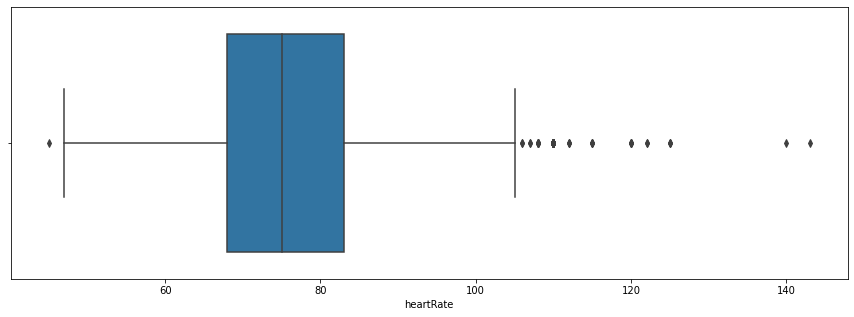

time: 292 ms (started: 2023-02-22 14:55:21 +00:00)


In [363]:
# plotting seaborn box plot to check the outliers in heartRate feature
plt.figure(figsize=(15,5))
sns.boxplot(x=df["heartRate"])

In [364]:
df[df['heartRate'].isnull()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1388,1388,64,1.0,M,YES,18.0,0.0,0,1,0,219.0,172.5,75.0,29.29,NaN,91.0,1


time: 19.4 ms (started: 2023-02-22 14:55:22 +00:00)


In [365]:
df['heartRate'].fillna(df['heartRate'].median(),inplace=True)

time: 1.94 ms (started: 2023-02-22 14:55:22 +00:00)


In [366]:
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            0
glucose            304
TenYearCHD           0
dtype: int64

time: 10.5 ms (started: 2023-02-22 14:55:22 +00:00)


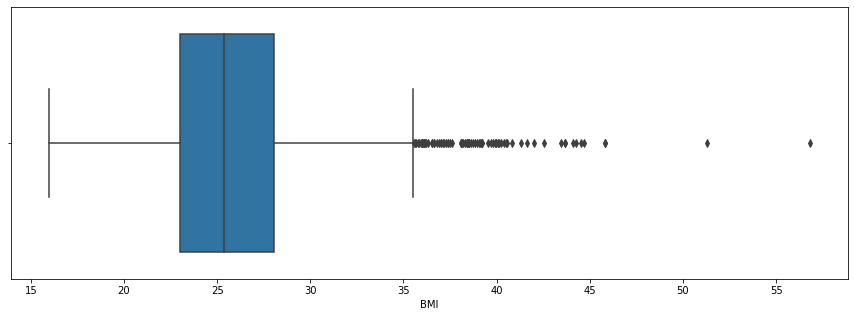

time: 185 ms (started: 2023-02-22 14:55:22 +00:00)


In [367]:
# plotting seaborn box plot to check the outliers in BMI feature
plt.figure(figsize=(15,5))
sns.boxplot(x= df["BMI"])

In [368]:
df['BMI'].fillna(df['BMI'].median(),inplace=True)

time: 2.58 ms (started: 2023-02-22 14:55:22 +00:00)


In [369]:
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            304
TenYearCHD           0
dtype: int64

time: 6.59 ms (started: 2023-02-22 14:55:22 +00:00)


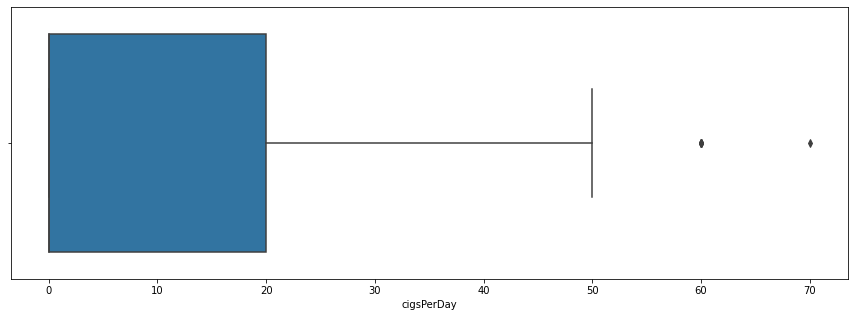

time: 160 ms (started: 2023-02-22 14:55:22 +00:00)


In [370]:
# plotting seaborn box plot to check the outliers in cigsPerDay feature
plt.figure(figsize=(15,5))
sns.boxplot(x= df["cigsPerDay"])

In [371]:
df['cigsPerDay'].fillna(df['cigsPerDay'].mean(),inplace=True)

time: 2.53 ms (started: 2023-02-22 14:55:22 +00:00)


In [372]:
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay           0
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            304
TenYearCHD           0
dtype: int64

time: 9.27 ms (started: 2023-02-22 14:55:22 +00:00)


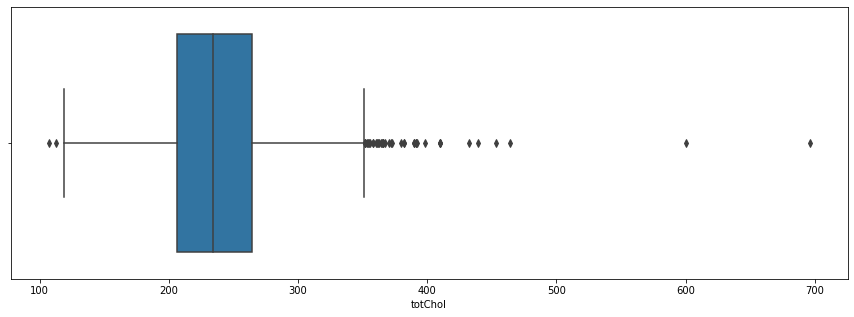

time: 713 ms (started: 2023-02-22 14:55:22 +00:00)


In [373]:
# plotting seaborn box plot to check the outliers in totChol feature
plt.figure(figsize=(15,5))
sns.boxplot(x= df["totChol"])

In [374]:
df['totChol'].fillna(df['totChol'].median(),inplace=True)

time: 2.3 ms (started: 2023-02-22 14:55:23 +00:00)


In [375]:
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay           0
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            304
TenYearCHD           0
dtype: int64

time: 10.2 ms (started: 2023-02-22 14:55:23 +00:00)


In [376]:
df['BPMeds'].fillna(df['BPMeds'].mode()[0],inplace=True)

time: 3.66 ms (started: 2023-02-22 14:55:23 +00:00)


In [377]:
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            304
TenYearCHD           0
dtype: int64

time: 9.78 ms (started: 2023-02-22 14:55:23 +00:00)


In [378]:
df['education'].fillna(df['education'].mode()[0],inplace=True)

time: 1.67 ms (started: 2023-02-22 14:55:23 +00:00)


In [379]:
df.isna().sum()

id                   0
age                  0
education            0
sex                  0
is_smoking           0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            304
TenYearCHD           0
dtype: int64

time: 11.3 ms (started: 2023-02-22 14:55:23 +00:00)


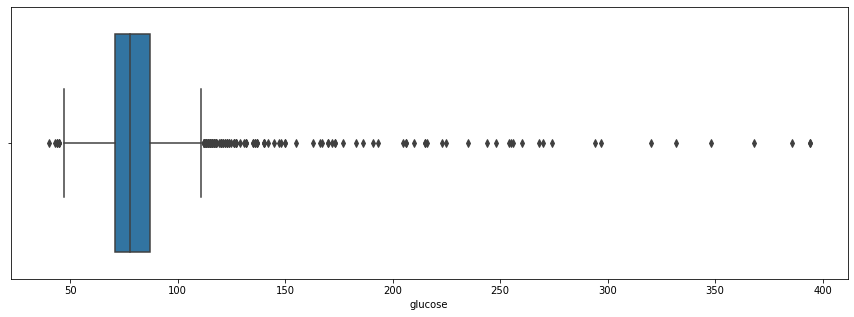

time: 156 ms (started: 2023-02-22 14:55:23 +00:00)


In [380]:
# plotting seaborn box plot to check the outliers in glucose feature
plt.figure(figsize=(15,5))
sns.boxplot(x= df["glucose"])

In [381]:
df['glucose'].fillna(df['glucose'].median(),inplace=True)

time: 2.38 ms (started: 2023-02-22 14:55:23 +00:00)


In [382]:
df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

time: 8.96 ms (started: 2023-02-22 14:55:23 +00:00)


In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1(Visualizing the target variable)

0    2879
1     511
Name: TenYearCHD, dtype: int64


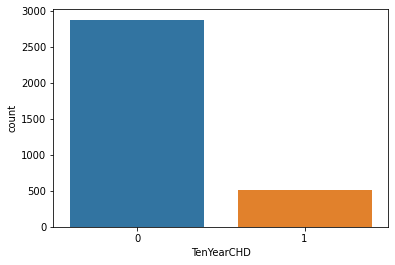

time: 157 ms (started: 2023-02-22 14:55:23 +00:00)


In [384]:
# Chart - 1 visualization code
y = df["TenYearCHD"]

sns.countplot(y)


target_temp = df.TenYearCHD.value_counts()

print(target_temp)

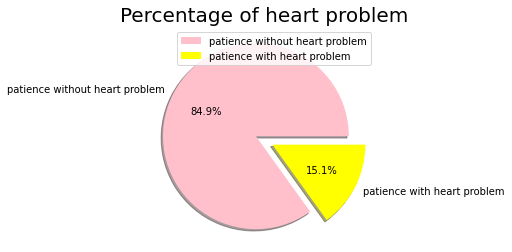

time: 100 ms (started: 2023-02-22 14:55:24 +00:00)


In [385]:
labels = 'patience without heart problem' , 'patience with heart problem'
sizes = df.TenYearCHD.value_counts()
colors = ['pink', 'yellow']
explode = (0.2, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title("Percentage of heart problem",fontsize=20)
plt.legend( labels, loc="best")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(4,4)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2(Frequency distribution of some categorical features over the people suffering from heart disease)

F    1684
M    1195
Name: sex, dtype: int64
NO     1467
YES    1412
Name: is_smoking, dtype: int64
0    2867
1      12
Name: prevalentStroke, dtype: int64
0    2065
1     814
Name: prevalentHyp, dtype: int64
0.0    2812
1.0      67
Name: BPMeds, dtype: int64
0    2825
1      54
Name: diabetes, dtype: int64


Text(0.5, 1.0, 'Effect of diabetes on heart disease')

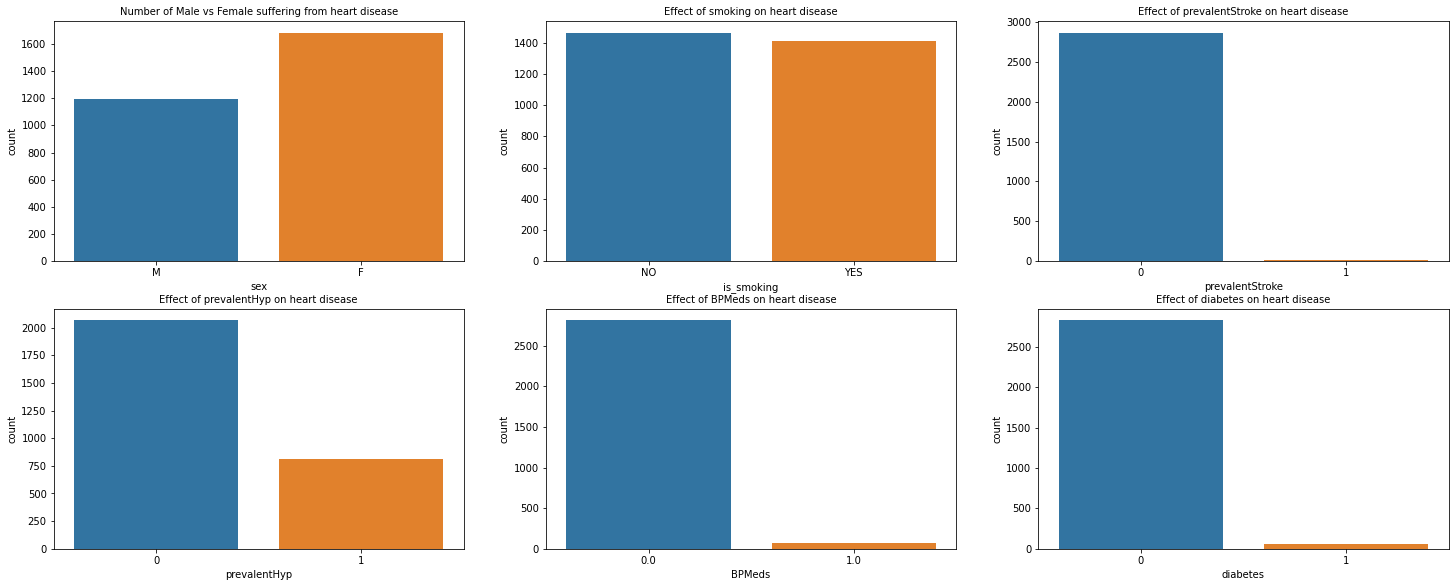

time: 848 ms (started: 2023-02-22 14:55:24 +00:00)


In [386]:
# Chart - 2 visualization code
#Effect of some continous features not considering CHD.
plt.figure(figsize=(25,15))

plt.subplot(3,3,1)
sns.countplot(df[df['TenYearCHD']==0]['sex'])
print(df[df['TenYearCHD']==0]['sex'].value_counts())
plt.title('Number of Male vs Female suffering from heart disease',size=10)

plt.subplot(3,3,2)
sns.countplot(df[df['TenYearCHD']==0]['is_smoking'])
print(df[df['TenYearCHD']==0]['is_smoking'].value_counts())
plt.title('Effect of smoking on heart disease',size=10)

plt.subplot(3,3,3)
sns.countplot(df[df['TenYearCHD']==0]['prevalentStroke'])
print(df[df['TenYearCHD']==0]['prevalentStroke'].value_counts())
plt.title('Effect of prevalentStroke on heart disease',size=10)

plt.subplot(3,3,4)
sns.countplot(df[df['TenYearCHD']==0]['prevalentHyp'])
print(df[df['TenYearCHD']==0]['prevalentHyp'].value_counts())
plt.title('Effect of prevalentHyp on heart disease',size=10)

plt.subplot(3,3,5)
sns.countplot(df[df['TenYearCHD']==0]['BPMeds'])
print(df[df['TenYearCHD']==0]['BPMeds'].value_counts())
plt.title('Effect of BPMeds on heart disease',size=10)

plt.subplot(3,3,6)
sns.countplot(df[df['TenYearCHD']==0]['diabetes'])
print(df[df['TenYearCHD']==0]['diabetes'].value_counts())
plt.title('Effect of diabetes on heart disease',size=10)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3(Percentage of education over people suffering from heart disease)

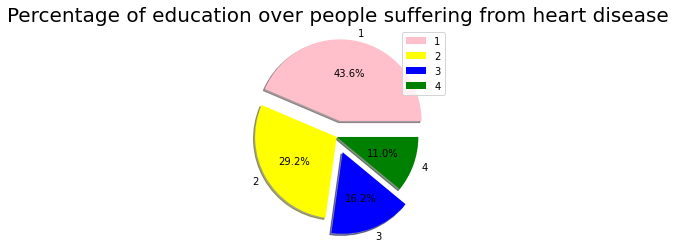

time: 133 ms (started: 2023-02-22 14:55:25 +00:00)


In [387]:
# Chart - 3 visualization code
labels = '1' , '2' , '3' , '4'
sizes = df.education.value_counts()
colors = ['pink', 'yellow','blue','green']
explode = (0.2, 0.0 , 0.2, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title("Percentage of education over people suffering from heart disease",fontsize=20)
plt.legend( labels, loc="best")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(4,4)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4(Which Age Group is more vulnerable to CHD?)

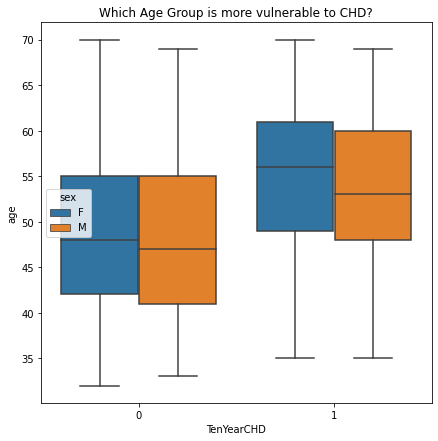

time: 203 ms (started: 2023-02-22 14:55:25 +00:00)


In [388]:
# Chart - 4 visualization code
plt.figure(figsize = (7,7))
sns.boxplot(df['TenYearCHD'], df['age'],hue=df['sex'])
plt.title("Which Age Group is more vulnerable to CHD?")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5(Are total cholestrol levels related to CHD ?)

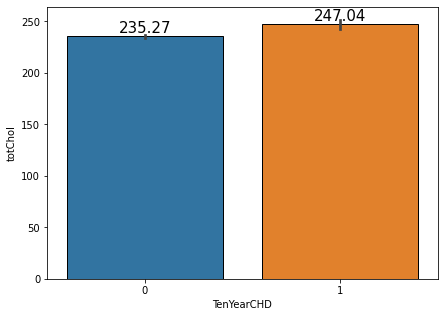

time: 205 ms (started: 2023-02-22 14:55:25 +00:00)


In [389]:
plt.figure(figsize=(7,5))
plots=sns.barplot(x=df['TenYearCHD'],y=df['totChol'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6(Is glucose level cause of CHD?)

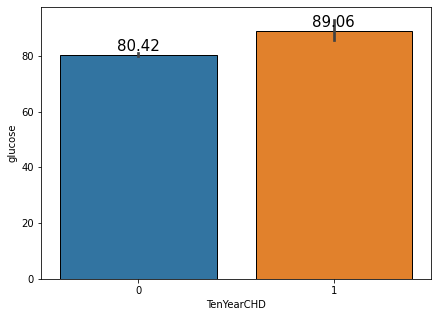

time: 198 ms (started: 2023-02-22 14:55:25 +00:00)


In [390]:
plt.figure(figsize=(7,5))
plots=sns.barplot(x=df['TenYearCHD'],y=df['glucose'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7(How heartRate is related to CHD?)

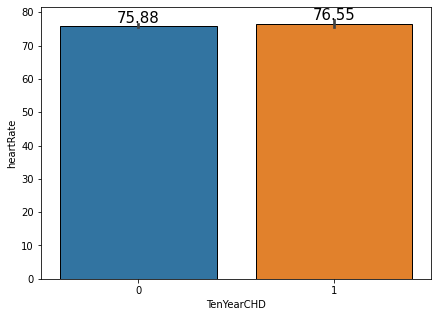

time: 241 ms (started: 2023-02-22 14:55:25 +00:00)


In [391]:
plt.figure(figsize=(7,5))
plots=sns.barplot(x=df['TenYearCHD'],y=df['heartRate'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8(How BMI is related to CHD?)

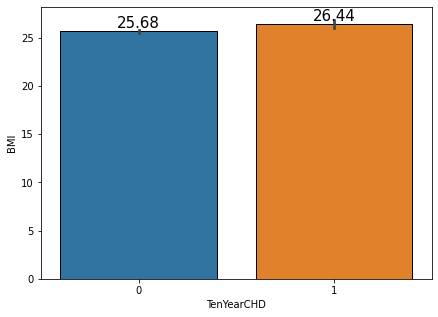

time: 201 ms (started: 2023-02-22 14:55:26 +00:00)


In [392]:
plt.figure(figsize=(7,5))
plots=sns.barplot(x=df['TenYearCHD'],y=df['BMI'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9(Are patients with systolic BP at risk of CHD?)

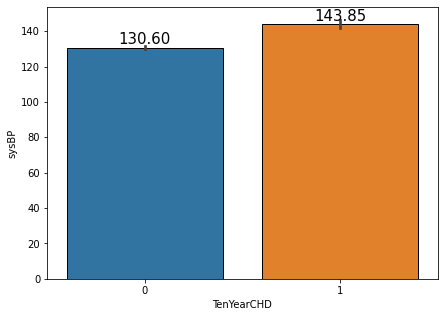

time: 224 ms (started: 2023-02-22 14:55:26 +00:00)


In [393]:
plt.figure(figsize=(7,5))
plots=sns.barplot(x=df['TenYearCHD'],y=df['sysBP'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10(Are patients with diastolic BP at risk of CHD?)

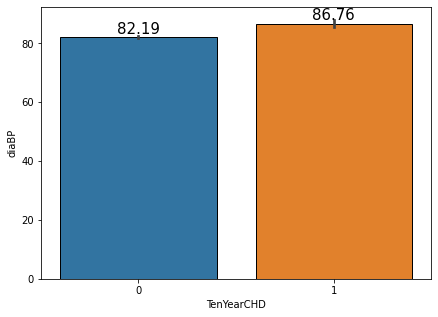

time: 187 ms (started: 2023-02-22 14:55:26 +00:00)


In [394]:
plt.figure(figsize=(7,5))
plots=sns.barplot(x=df['TenYearCHD'],y=df['diaBP'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4ba93ac310>,
      dtype=object)

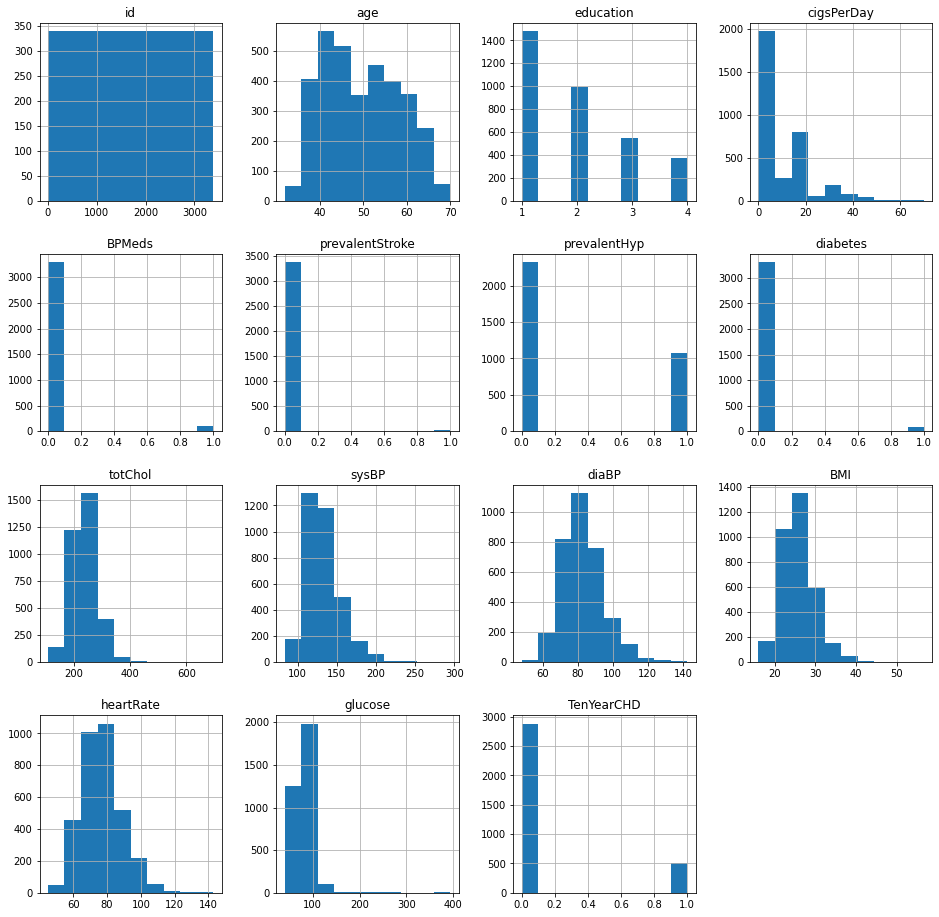

time: 2.55 s (started: 2023-02-22 14:55:26 +00:00)


In [395]:
# Chart - 11 visualization code
df.hist(figsize=(16,16))

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [396]:
# Chart - 12 visualization code

time: 333 µs (started: 2023-02-22 14:55:29 +00:00)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [397]:
# Chart - 13 visualization code

time: 480 µs (started: 2023-02-22 14:55:29 +00:00)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [398]:
# Correlation Heatmap visualization code

time: 533 µs (started: 2023-02-22 14:55:29 +00:00)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [399]:
# Pair Plot visualization code

time: 528 µs (started: 2023-02-22 14:55:29 +00:00)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [400]:
# Perform Statistical Test to obtain P-Value

time: 585 µs (started: 2023-02-22 14:55:29 +00:00)


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [401]:
# Perform Statistical Test to obtain P-Value

time: 514 µs (started: 2023-02-22 14:55:29 +00:00)


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [402]:
# Perform Statistical Test to obtain P-Value

time: 525 µs (started: 2023-02-22 14:55:29 +00:00)


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [403]:
# Handling Missing Values & Missing Value Imputation

time: 807 µs (started: 2023-02-22 14:55:29 +00:00)


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [404]:
#Separating Continous features
df.dtypes!=0

id                 True
age                True
education          True
sex                True
is_smoking         True
cigsPerDay         True
BPMeds             True
prevalentStroke    True
prevalentHyp       True
diabetes           True
totChol            True
sysBP              True
diaBP              True
BMI                True
heartRate          True
glucose            True
TenYearCHD         True
dtype: bool

time: 16.4 ms (started: 2023-02-22 14:55:29 +00:00)


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [405]:
# Expand Contraction

time: 488 µs (started: 2023-02-22 14:55:29 +00:00)


#### 2. Lower Casing

In [406]:
# Lower Casing

time: 831 µs (started: 2023-02-22 14:55:29 +00:00)


#### 3. Removing Punctuations

In [407]:
# Remove Punctuations

time: 522 µs (started: 2023-02-22 14:55:29 +00:00)


#### 4. Removing URLs & Removing words and digits contain digits.

In [408]:
# Remove URLs & Remove words and digits contain digits

time: 506 µs (started: 2023-02-22 14:55:29 +00:00)


#### 5. Removing Stopwords & Removing White spaces

In [409]:
# Remove Stopwords

time: 516 µs (started: 2023-02-22 14:55:29 +00:00)


In [410]:
# Remove White spaces

time: 719 µs (started: 2023-02-22 14:55:29 +00:00)


#### 6. Rephrase Text

In [411]:
# Rephrase Text

time: 508 µs (started: 2023-02-22 14:55:29 +00:00)


#### 7. Tokenization

In [412]:
# Tokenization

time: 524 µs (started: 2023-02-22 14:55:29 +00:00)


#### 8. Text Normalization

In [413]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

time: 769 µs (started: 2023-02-22 14:55:29 +00:00)


##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [414]:
# POS Taging

time: 480 µs (started: 2023-02-22 14:55:29 +00:00)


#### 10. Text Vectorization

In [415]:
# Vectorizing Text

time: 593 µs (started: 2023-02-22 14:55:29 +00:00)


##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [416]:
# Extracting a new feature MAP from existing feature sysBP and diaBP
df['MeanArterialPressure']= round((df['diaBP']+(df['sysBP']-df['diaBP'])/3),2)

time: 6.19 ms (started: 2023-02-22 14:55:29 +00:00)


In [417]:
df.drop(['sysBP','diaBP'],axis=1,inplace=True)

time: 7.5 ms (started: 2023-02-22 14:55:29 +00:00)


In [418]:
def At_diabetes_risk(row):
  if (row['glucose']<140 and row['diabetes']==0):
    value = 0
  else:
    value = 1
  return value

time: 1.26 ms (started: 2023-02-22 14:55:29 +00:00)


In [419]:
df['detect_diabetes']=df.apply(At_diabetes_risk,axis=1)

time: 62.5 ms (started: 2023-02-22 14:55:29 +00:00)


In [420]:
df.drop(['glucose','diabetes'],axis=1,inplace=True)

time: 3.44 ms (started: 2023-02-22 14:55:29 +00:00)


In [421]:
# Changing cigsperday into a categorical column
for i in range(len(df)):
  if df['cigsPerDay'][i] == 0:
    df['cigsPerDay'][i] = 'No Consumption'
  elif df['cigsPerDay'][i] > 0 and df['cigsPerDay'][i] < 20:
    df['cigsPerDay'][i] = 'Average consumtion'
  else:
    df['cigsPerDay'][i] = 'High Consumption'

time: 60.9 ms (started: 2023-02-22 14:55:29 +00:00)


In [422]:
df.drop(['is_smoking'],axis=1,inplace=True)

time: 3.03 ms (started: 2023-02-22 14:55:29 +00:00)


In [423]:
def At_BP_risk(row):
  if (row['prevalentHyp']==0 and row['BPMeds']==0):
    value = 0
  elif((row['prevalentHyp']==1 and row['BPMeds']==0) or (row['prevalentHyp']==1 and row['BPMeds']==1) or (row['prevalentHyp']==0 and row['BPMeds']==1)):
    value = 1
  return value

time: 1.19 ms (started: 2023-02-22 14:55:29 +00:00)


In [424]:
df['BP_patients']=df.apply(At_BP_risk,axis=1)

time: 57.9 ms (started: 2023-02-22 14:55:29 +00:00)


In [425]:
df.drop(['prevalentHyp','BPMeds'],axis=1,inplace=True)

time: 3.33 ms (started: 2023-02-22 14:55:29 +00:00)


In [426]:
# Encode your categorical columns
df=pd.get_dummies(df, columns=['sex','education', 'prevalentStroke', 'BP_patients', 'cigsPerDay','detect_diabetes'])
df.columns

Index(['id', 'age', 'totChol', 'BMI', 'heartRate', 'TenYearCHD',
       'MeanArterialPressure', 'sex_F', 'sex_M', 'education_1.0',
       'education_2.0', 'education_3.0', 'education_4.0', 'prevalentStroke_0',
       'prevalentStroke_1', 'BP_patients_0', 'BP_patients_1',
       'cigsPerDay_Average consumtion', 'cigsPerDay_High Consumption',
       'cigsPerDay_No Consumption', 'detect_diabetes_0', 'detect_diabetes_1'],
      dtype='object')

time: 16.7 ms (started: 2023-02-22 14:55:29 +00:00)


#### 2. Feature Selection

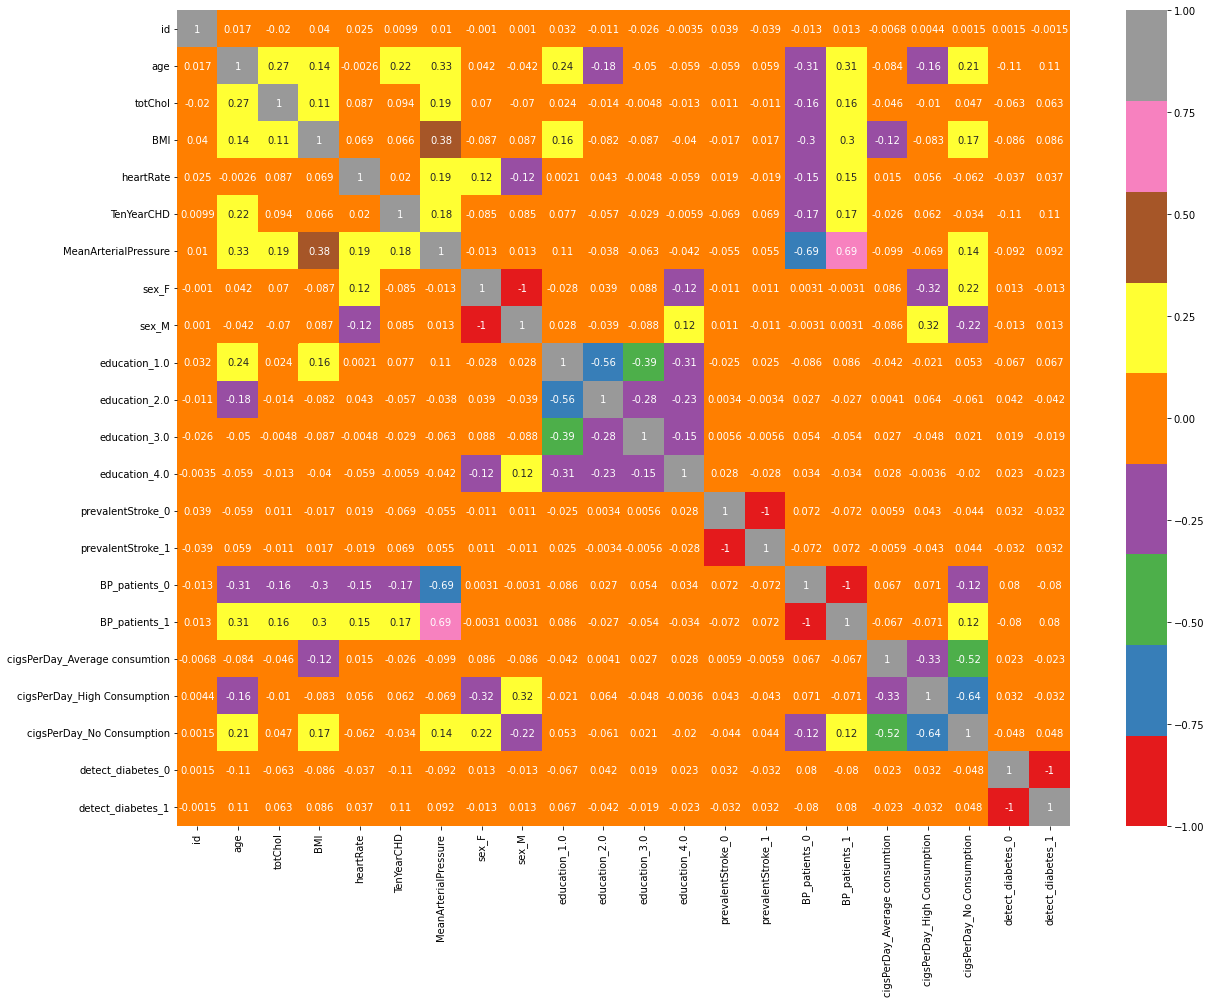

time: 3.5 s (started: 2023-02-22 14:55:29 +00:00)


In [427]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap=sns.color_palette("Set1"))

In [428]:
df.drop(['BMI'],axis=1,inplace=True)

time: 7.04 ms (started: 2023-02-22 14:55:33 +00:00)


In [429]:
df.drop(['MeanArterialPressure','cigsPerDay_Average consumtion'],axis=1,inplace=True)

time: 2.26 ms (started: 2023-02-22 14:55:33 +00:00)


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

In [430]:
# Applying logarithmic transformation on age feature
df['age']=np.log(df['age']+1)

time: 2.27 ms (started: 2023-02-22 14:55:33 +00:00)


#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [431]:
# Transform Your data

time: 471 µs (started: 2023-02-22 14:55:33 +00:00)


### 6. Data Scaling

In [432]:
# Scaling your data
x= df.drop(columns='TenYearCHD',axis=1)
y= df[['TenYearCHD']]

time: 7.16 ms (started: 2023-02-22 14:55:33 +00:00)


In [433]:
# Importing StandardScaler for Data Scaling
from sklearn.preprocessing import StandardScaler

# Creating object
std_scaler= StandardScaler()

# Fit and Transform
x= std_scaler.fit_transform(x)

time: 7.93 ms (started: 2023-02-22 14:55:33 +00:00)


In [434]:
# Scaling your data

time: 463 µs (started: 2023-02-22 14:55:33 +00:00)


##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [435]:
# DImensionality Reduction (If needed)

time: 473 µs (started: 2023-02-22 14:55:33 +00:00)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [436]:
# Split your data to train and test. Choose Splitting ratio wisely.

## Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

## Spliting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

time: 50.8 ms (started: 2023-02-22 14:55:33 +00:00)


In [437]:
# Split your data to train and test. Choose Splitting ratio wisely.

time: 448 µs (started: 2023-02-22 14:55:33 +00:00)


##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

0    2879
1     511
Name: TenYearCHD, dtype: int64
Percentage of majority(0) and minority class(1): 84.93 % and 15.07 %


Text(0, 0.5, 'Frequency')

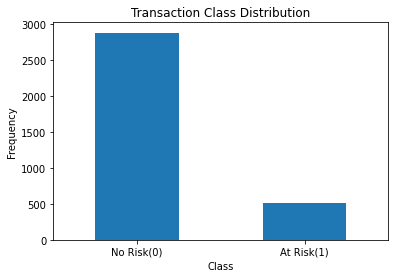

time: 293 ms (started: 2023-02-22 14:55:33 +00:00)


In [438]:
# Handling Imbalanced Dataset (If needed)
print(df['TenYearCHD'].value_counts())
print(f"Percentage of majority(0) and minority class(1): {round(len(df[df['TenYearCHD']==0])*100/len(df['TenYearCHD']),2)} % and {round(len(df[df['TenYearCHD']==1])*100/len(df['TenYearCHD']),2)} %")

# Visualizing the imbalanced class
count_classes = pd.value_counts(df['TenYearCHD'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), ['No Risk(0)', 'At Risk(1)'])
plt.xlabel("Class")
plt.ylabel("Frequency")

In [439]:
# Importing SMOTE for balancing the dataset
from imblearn.combine import SMOTETomek

# Handling class imbalance by oversampling followed by removing the Tomek link
x_smote, y_smote = SMOTETomek(random_state=0).fit_resample(x_train, y_train)

# Checking Value counts for both classes Before and After handling Class Imbalance:
for col,label in [[y_train,"Before"],[y_smote,'After']]:
  print(label+' Handling Class Imbalace:')
  print(col.value_counts(),'\n')

Before Handling Class Imbalace:
TenYearCHD
0             2303
1              409
dtype: int64 

After Handling Class Imbalace:
TenYearCHD
0             2231
1             2231
dtype: int64 

time: 668 ms (started: 2023-02-22 14:55:33 +00:00)


##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [440]:
# Handling Imbalanced Dataset (If needed)

time: 487 µs (started: 2023-02-22 14:55:34 +00:00)


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [441]:
# Importing classification metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import make_scorer, recall_score, f1_score

time: 859 µs (started: 2023-02-22 14:55:34 +00:00)


In [442]:
# Defining a function to train the input model and print evaluation matrix
def analyse_model(model, x_train, x_test, y_train, y_test):

  '''Takes classifier model, train-set and test-set as input and prints the evaluation matrices with the plot and returns the model'''

  # Fitting the model
  model.fit(x_train,y_train)

  # Feature importances
  try:
    try:
      importance = model.feature_importances_
      feature = x.columns
    except:
      importance = np.abs(model.coef_[0])
      feature = x.columns
    indices = np.argsort(importance)
    indices = indices[::-1]
  except:
    pass

  # Plotting Evaluation Metrics for train and test dataset
  for x, act, label in ((x_train, y_train, 'Train-Set'),(x_test, y_test, "Test-Set")):

    # Getting required metrics
    pred = model.predict(x)
    pred_proba = model.predict_proba(x)[:,1]
    report = pd.DataFrame(classification_report(y_pred=pred, y_true=act, output_dict=True))
    fpr, tpr, thresholds = roc_curve(act, pred_proba)

    # Classification report
    plt.figure(figsize=(18,3))
    plt.subplot(1,3,1)
    sns.heatmap(report.iloc[:-1, :-1].T, annot=True, cmap=sns.color_palette("crest", as_cmap=True),annot_kws={"fontsize":14, "fontweight":"bold"})
    plt.title(f'{label} Classification Report')

    # Confusion Matrix
    plt.subplot(1,3,2)
    matrix= confusion_matrix(y_true=act, y_pred=pred)
    rounded_matrix= np.around(matrix, decimals=2)
    sns.heatmap(rounded_matrix, annot=True, cmap=sns.color_palette("flare", as_cmap=True),fmt=".2f", annot_kws={"fontsize":14, "fontweight":"bold"})
    plt.title(f'{label} Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')
    
    # AUC_ROC Curve
    plt.subplot(1,3,3)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
    plt.legend(loc=4)
    plt.title(f'{label} AUC_ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()

  # Plotting Feature Importance
  try:
    plt.figure(figsize=(18,3))
    plt.bar(range(len(indices)),importance[indices])
    plt.xticks(range(len(indices)), [feature[i] for i in indices])
    plt.title('Feature Importance')
    plt.tight_layout()
  except:
    pass
  plt.show()

  return model

time: 25.5 ms (started: 2023-02-22 14:55:35 +00:00)


### ML Model - 1 Logistic Regression

In [443]:
from sklearn.linear_model import LogisticRegression

time: 802 µs (started: 2023-02-22 14:55:35 +00:00)


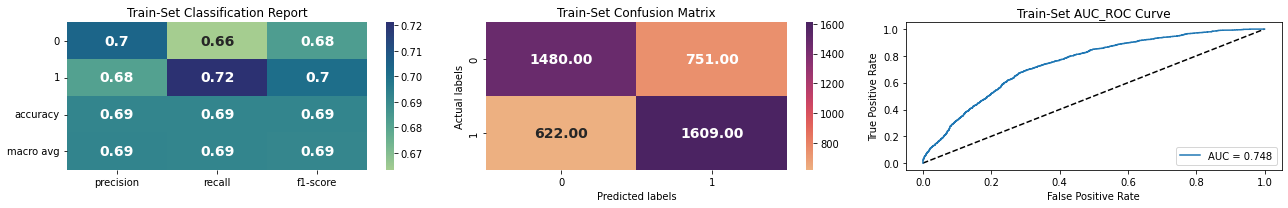

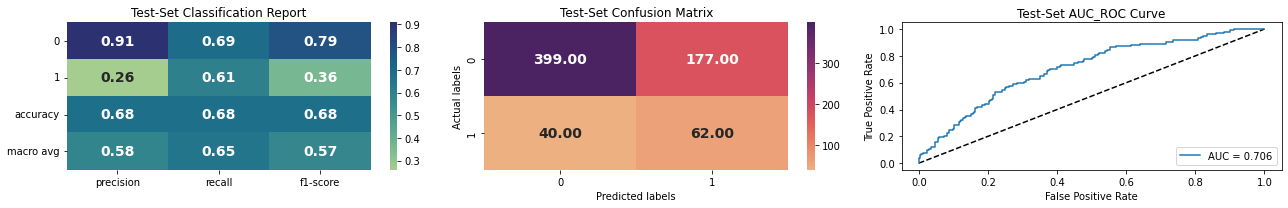

<Figure size 1296x216 with 0 Axes>

LogisticRegression(max_iter=10000)

time: 2.9 s (started: 2023-02-22 14:55:35 +00:00)


In [444]:
# Fitting Logistic Regression Model
logistic_classifier = LogisticRegression(fit_intercept=True, max_iter=10000)
analyse_model(logistic_classifier, x_smote, x_test, y_smote, y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [445]:
# Visualizing evaluation Metric Score chart

time: 524 µs (started: 2023-02-22 14:55:38 +00:00)


#### 2. Cross- Validation & Hyperparameter Tuning

In [446]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

time: 771 µs (started: 2023-02-22 14:55:38 +00:00)


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2 Random Forest

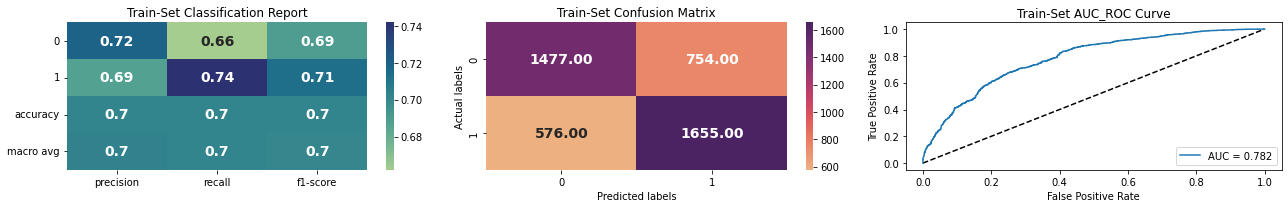

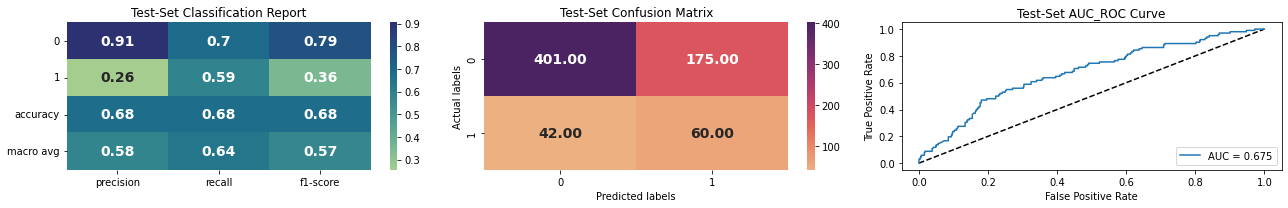

<Figure size 1296x216 with 0 Axes>

RandomForestClassifier(max_depth=3, n_estimators=200, n_jobs=-1, random_state=0)

time: 4.51 s (started: 2023-02-22 14:55:38 +00:00)


In [447]:
# Importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Fitting RandomForestClassifier Model
RF_classifier = RandomForestClassifier(n_estimators=200,max_depth=3,n_jobs=-1,random_state=0)

# Analysing the model
analyse_model(RF_classifier, x_smote, x_test, y_smote, y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [448]:
# Visualizing evaluation Metric Score chart

time: 460 µs (started: 2023-02-22 14:55:43 +00:00)


#### 2. Cross- Validation & Hyperparameter Tuning

In [449]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

time: 2.59 ms (started: 2023-02-22 14:55:43 +00:00)


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 XGboost

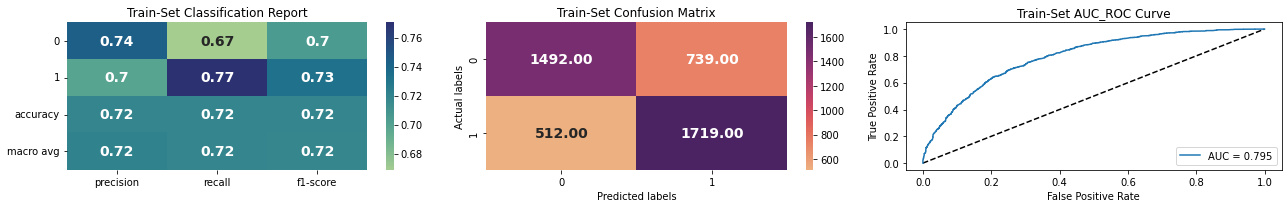

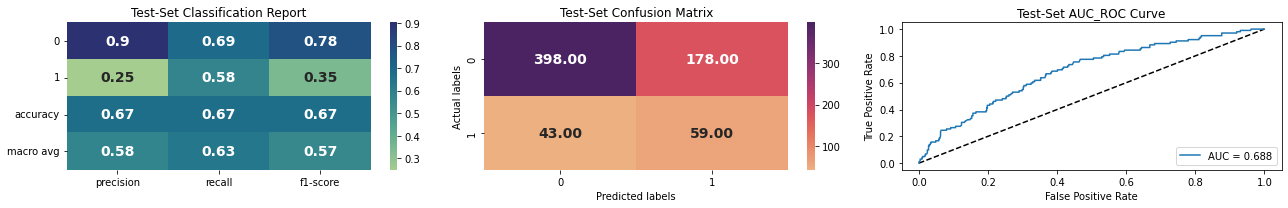

<Figure size 1296x216 with 0 Axes>

XGBClassifier(max_depth=1, n_estimators=150, n_jobs=-1)

time: 8.2 s (started: 2023-02-22 14:55:43 +00:00)


In [450]:
# Importing RandomForestClassifier
from xgboost import XGBClassifier

# Fitting RandomForestClassifier Model
XGB_classifier = XGBClassifier(n_estimators=150,max_depth=1,n_jobs=-1,random_state=0)

# Analysing the model
analyse_model(XGB_classifier, x_smote, x_test, y_smote, y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [451]:
# Visualizing evaluation Metric Score chart

time: 479 µs (started: 2023-02-22 14:55:51 +00:00)


#### 2. Cross- Validation & Hyperparameter Tuning

In [452]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

time: 506 µs (started: 2023-02-22 14:55:51 +00:00)


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 4 Naive Bayes

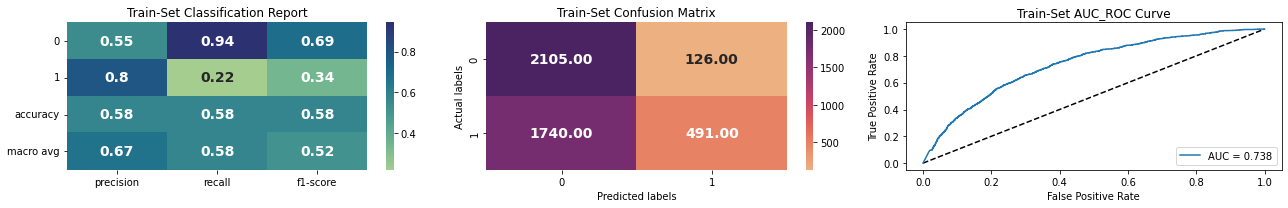

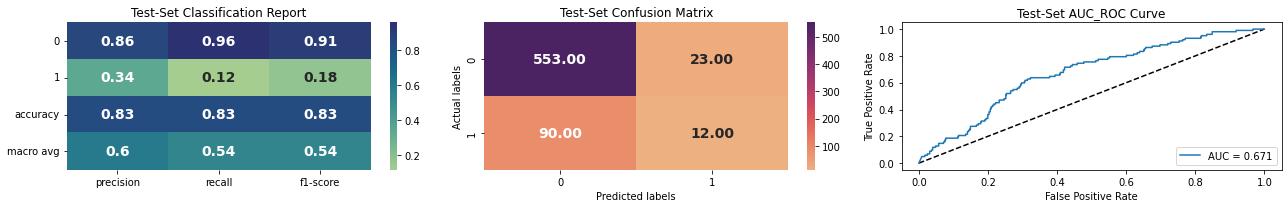

<Figure size 1296x216 with 0 Axes>

GaussianNB()

time: 2.68 s (started: 2023-02-22 14:55:51 +00:00)


In [453]:
# Importing GaussianNB
from sklearn.naive_bayes import GaussianNB

# Fitting RandomForestClassifier Model
NB_classifier = GaussianNB()

# Analysing the model
analyse_model(NB_classifier, x_smote, x_test, y_smote, y_test)

### ML Model - 5 KNN

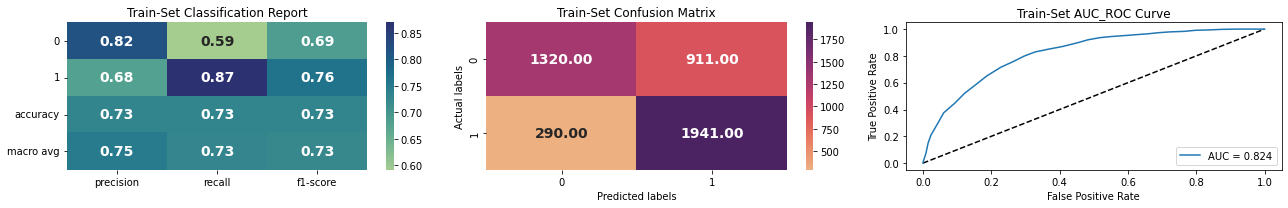

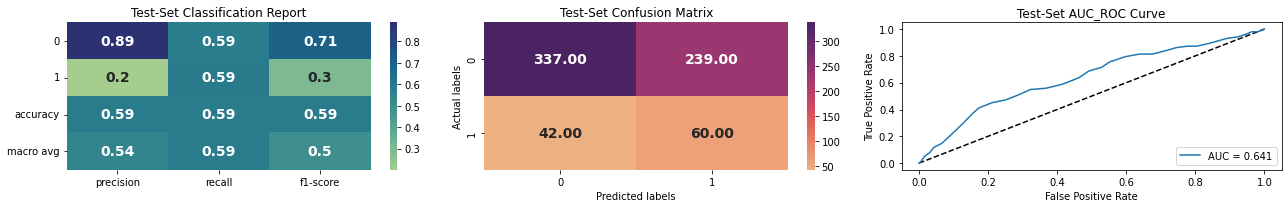

<Figure size 1296x216 with 0 Axes>

KNeighborsClassifier(n_neighbors=35)

time: 6.36 s (started: 2023-02-22 14:55:54 +00:00)


In [454]:
# Importing GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Fitting KNeighborsClassifier Model
KNN_classifier = KNeighborsClassifier(n_neighbors=35,p=2,metric='minkowski')

# Analysing the model
analyse_model(KNN_classifier, x_smote, x_test, y_smote, y_test)

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [455]:
# Save the File

time: 573 µs (started: 2023-02-22 14:56:00 +00:00)


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [456]:
# Load the File and predict unseen data.

time: 459 µs (started: 2023-02-22 14:56:00 +00:00)


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***